<a href="https://colab.research.google.com/github/ryghrmni/MyPyLibs/blob/main/PYSPARK/pyspark_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PySpark**
PySpark is an interface for Apache Spark in Python. It not only allows you to write Spark applications using Python APIs, but also provides the PySpark shell for interactively analyzing your data in a distributed environment.

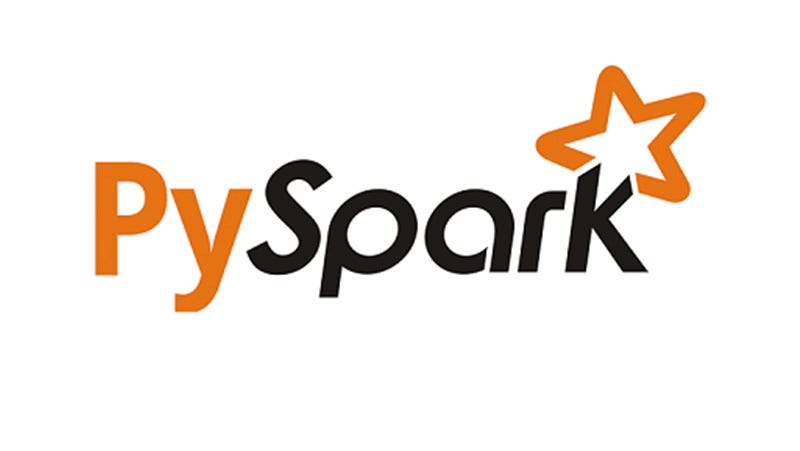

**reference:** https://spark.apache.org/docs/3.3.1/api/python/index.html#

### **About Data:**

The **Yelp dataset** is a publicly available dataset provided by Yelp for educational and academic purposes. It's often used for data analysis, machine learning, educational projects, and more. The dataset features a subset of Yelp's businesses, reviews, and user data that has been anonymized. It's typically used as a rich source of real-world data for those interested in consumer behavior, business analytics, and other fields.

**Key Components of the Yelp Dataset:**
1. Businesses: This includes information about various businesses listed on Yelp, similar to the dataset we have. Data points for each business might include location, categories, review count, and star ratings.

2. Reviews: Text reviews that users have written on Yelp businesses. These reviews include the user ID of the reviewer, the business ID of the business being reviewed, the text of the review, and a star rating.

3. Users: Information about Yelp users who have written reviews, including their friend network within Yelp, the total number of reviews they've written, and their average rating score.

The dataset used in this tutorial is derived from the Yelp dataset, where data related to the city of Edmonton has been extracted.

**reference:** https://www.yelp.com/dataset

## **Setting Up PySpark**









1. **Installation:**
First, ensure that you have PySpark installed in your environment. You can install it via pip if it's not already installed:
```
pip install pyspark
```

For more information: https://spark.apache.org/docs/3.3.1/api/python/getting_started/install.html

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=db9199efb585f6d2a88a8dc08fc50916bbfcb4d60c7305a642420cd268f2e4fc
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


2. **Initialize Spark Session:**
PySpark applications start with initializing SparkSession which is the entry point of PySpark as below. In case of running it in PySpark shell via pyspark executable, the shell automatically creates the session in the variable spark for users.

For more information: https://spark.apache.org/docs/3.3.1/api/python/getting_started/quickstart_df.html

In [2]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("Yelp Restaurant Recommendation System") \
    .getOrCreate()

**3. Creating Dataframe**

In [15]:
# Sample data to create a DataFrame
data = [
    ("Alice", 4),
    ("Bob", 2),
    ("Charlie", 5),
    ("David", 3),
    ("Eve", 1)
]

# Create DataFrame
columns = ["name", "stars"]
df = spark.createDataFrame(data, columns)

# Show the original DataFrame
print("Original DataFrame:")
df.show()

Original DataFrame:
+-------+-----+
|   name|stars|
+-------+-----+
|  Alice|    4|
|    Bob|    2|
|Charlie|    5|
|  David|    3|
|    Eve|    1|
+-------+-----+



4. **Load the Dataset**

* **spark.read.csv(path, header=True, inferSchema=True):** Reads a CSV file into a DataFrame.

* **spark.read.json(path):** Reads a JSON file into a DataFrame.
* **spark.read.parquet(path):** Reads a Parquet file into a DataFrame.
* **spark.read.format(format).load(path):** Generic method to load data in different formats.

In [19]:
business_df = spark.read.json("business-edmonton.json")
review_df = spark.read.json("review-edmonton.json")

## **Basic Data Operations**

1. **Display the Data**

In [4]:
business_df.show()
business_df.show(5)

+--------------------+--------------------+--------------------+--------------------+--------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|    city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+--------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|10303  108 Street NW|{NULL, NULL, u'no...|JX4tUpd09YFchLBuI...|Arts & Entertainm...|Edmonton|{11:0-1:0, 11:0-1...|      1|   53.5446819|    -113.506589|Naked Cyber Cafe ...|    T5J 1L7|          12|  4.0|   AB|
|11642 104 Avenue,...|{NULL, NULL, NULL...|5BmQX4UVJY19mMtaf...|Specialty Food, B...|Edmonton|{9:0-18:0, 9:0-18...|      1|    53.547205|    -113.522448

In [5]:
review_df.show()

+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|business_stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|0ICfbEImE0gUZc4kS...|           2.5|   0|2013-11-14 04:58:09|    0|rV6AWGN4rYORMQY8d...|  5.0|Replaced 2 old 70...|     1|dKoIp8vsKFH4cbmGS...|
|kPG6r0h73sPgXBei0...|           4.5|   0|2017-05-26 00:44:54|    0|nYFpOY84gzeAz7ujV...|  5.0|Was in town for a...|     0|_AKBxw2s3A-8Y8HC0...|
|wqj6JquckEOs1h7rs...|           4.0|   0|2013-01-27 18:10:56|    0|vdtWa5Ym9ImeMMOHw...|  4.0|I can only commen...|     1|YRFeRq--jTV6G3HMg...|
|f06mf_7bT8FibS2Ue...|           4.0|   1|2012-06-26 05:06:01|    1|dTr-7y6FCf-EUgvAt...|  5.0|Great store. Insa...|     2|JW_742K

**2. Print the Schema:** This will help you understand the structure of your data.

In [6]:
business_df.printSchema()
review_df.printSchema()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: string (nullable = true)
 |    |-- GoodForKids: string (nullable = true)
 |    |-- GoodForMeal: string (nullab

**3. Describe**

In [7]:
business_df.describe().show()
review_df.describe().show()

+-------+--------------------+--------------------+--------------------+--------+-------+-------------------+-------------------+------------+-----------+------------------+------------------+-----+
|summary|             address|         business_id|          categories|    city|is_open|           latitude|          longitude|        name|postal_code|      review_count|             stars|state|
+-------+--------------------+--------------------+--------------------+--------+-------+-------------------+-------------------+------------+-----------+------------------+------------------+-----+
|  count|                3916|                3916|                3915|    3916|   3916|               3916|               3916|        3916|       3916|              3916|              3916| 3916|
|   mean|                NULL|                NULL|                NULL|    NULL|    1.0| 53.525826308605055|-113.51753769739787|        NULL|       NULL|20.194841675178754|3.4514811031664965| NULL|
| std

**4. Select Specific Columns**

In [20]:
# Select the required columns from the dataset
business_cols = ['business_id', 'name', 'categories', 'city', 'latitude', 'longitude', 'is_open']
review_cols = ['review_id', 'user_id', 'business_id', 'stars', 'text']

In [21]:
new_business_df = business_df.select(business_cols)
new_review_df = review_df.select(review_cols)

In [22]:
new_business_df.show()
new_review_df.show()

+--------------------+--------------------+--------------------+--------+-------------+---------------+-------+
|         business_id|                name|          categories|    city|     latitude|      longitude|is_open|
+--------------------+--------------------+--------------------+--------+-------------+---------------+-------+
|JX4tUpd09YFchLBuI...|Naked Cyber Cafe ...|Arts & Entertainm...|Edmonton|   53.5446819|    -113.506589|      1|
|5BmQX4UVJY19mMtaf...|Breadland Organic...|Specialty Food, B...|Edmonton|    53.547205|    -113.522448|      1|
|mFTaYsRDyeFaY2NDL...|    River City Games|Tabletop Games, S...|Edmonton|53.4893123495|-113.4855665582|      1|
|h_qlv6CIXGVurFOhF...|         Tim Hortons|  Coffee & Tea, Food|Edmonton|53.5599789914|-113.6162690363|      1|
|EDNYAyVc_WFhM3CD6...|Ottewell Animal C...| Pets, Veterinarians|Edmonton|    53.525585|    -113.427076|      1|
|qps-oF95uqPoV7fiX...|Bear's Skin Art S...|Beauty & Spas, Ta...|Edmonton|53.5612008627|-113.5670928251| 

**5. Filter the Data**

In [23]:
from pyspark.sql.functions import col

# Filter only restaurants
restaurant_df = business_df.filter(col("categories").contains("Restaurants"))

In [24]:
restaurant_df.show(5)

+--------------------+--------------------+--------------------+--------------------+--------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|    city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+--------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|6187 Currents Dri...|{NULL, NULL, u'be...|JfGfqCnk0-Tnf6Pla...|Restaurants, Burgers|Edmonton|{11:0-22:0, 11:0-...|      1|    53.436403|    -113.604288|      Burger Village|    T6W 0L9|          10|  4.0|   AB|
|2890-8882 170 Str...|{NULL, NULL, u'no...|JwBTq6IOFH97b9Hr6...|Food, Coffee & Te...|Edmonton|                NULL|      1|53.5225968429|  -113.61922974

In [25]:
# Filter rows where stars > 3
high_rated_reviews  = review_df.filter(review_df["stars"] > 3)

high_rated_reviews.show()

+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|business_stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|0ICfbEImE0gUZc4kS...|           2.5|   0|2013-11-14 04:58:09|    0|rV6AWGN4rYORMQY8d...|  5.0|Replaced 2 old 70...|     1|dKoIp8vsKFH4cbmGS...|
|kPG6r0h73sPgXBei0...|           4.5|   0|2017-05-26 00:44:54|    0|nYFpOY84gzeAz7ujV...|  5.0|Was in town for a...|     0|_AKBxw2s3A-8Y8HC0...|
|wqj6JquckEOs1h7rs...|           4.0|   0|2013-01-27 18:10:56|    0|vdtWa5Ym9ImeMMOHw...|  4.0|I can only commen...|     1|YRFeRq--jTV6G3HMg...|
|f06mf_7bT8FibS2Ue...|           4.0|   1|2012-06-26 05:06:01|    1|dTr-7y6FCf-EUgvAt...|  5.0|Great store. Insa...|     2|JW_742K

**6. Dropping Columns**

In [28]:
# Dropping a single column
date_dropped = review_df.drop("date")
date_dropped.show(5)

+--------------------+--------------+----+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|business_stars|cool|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+--------------+----+-----+--------------------+-----+--------------------+------+--------------------+
|0ICfbEImE0gUZc4kS...|           2.5|   0|    0|rV6AWGN4rYORMQY8d...|  5.0|Replaced 2 old 70...|     1|dKoIp8vsKFH4cbmGS...|
|kPG6r0h73sPgXBei0...|           4.5|   0|    0|nYFpOY84gzeAz7ujV...|  5.0|Was in town for a...|     0|_AKBxw2s3A-8Y8HC0...|
|wqj6JquckEOs1h7rs...|           4.0|   0|    0|vdtWa5Ym9ImeMMOHw...|  4.0|I can only commen...|     1|YRFeRq--jTV6G3HMg...|
|f06mf_7bT8FibS2Ue...|           4.0|   1|    1|dTr-7y6FCf-EUgvAt...|  5.0|Great store. Insa...|     2|JW_742Kc_BeN-tvAC...|
|S3Kl763P-wKnDLFy0...|           2.5|   0|    2|5GNDjFV7Vi7Uganf6...|  2.0|Let's be honest, ...|     2|7OUAzKZj6LUrQ3G7g...|


In [26]:
# Dropping multiple column
reviews_dropped = review_df.drop("cool", "funny")
reviews_dropped.show(5)

+--------------------+--------------+-------------------+--------------------+-----+--------------------+------+--------------------+
|         business_id|business_stars|               date|           review_id|stars|                text|useful|             user_id|
+--------------------+--------------+-------------------+--------------------+-----+--------------------+------+--------------------+
|0ICfbEImE0gUZc4kS...|           2.5|2013-11-14 04:58:09|rV6AWGN4rYORMQY8d...|  5.0|Replaced 2 old 70...|     1|dKoIp8vsKFH4cbmGS...|
|kPG6r0h73sPgXBei0...|           4.5|2017-05-26 00:44:54|nYFpOY84gzeAz7ujV...|  5.0|Was in town for a...|     0|_AKBxw2s3A-8Y8HC0...|
|wqj6JquckEOs1h7rs...|           4.0|2013-01-27 18:10:56|vdtWa5Ym9ImeMMOHw...|  4.0|I can only commen...|     1|YRFeRq--jTV6G3HMg...|
|f06mf_7bT8FibS2Ue...|           4.0|2012-06-26 05:06:01|dTr-7y6FCf-EUgvAt...|  5.0|Great store. Insa...|     2|JW_742Kc_BeN-tvAC...|
|S3Kl763P-wKnDLFy0...|           2.5|2014-11-30 00:39:26|5GNDj

In [29]:
# Dropping Rows with Missing Values

# Drop rows with any null values
cleaned_df = review_df.dropna()
# Show the results to verify rows with null values are dropped
cleaned_df.show()

+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|business_stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|0ICfbEImE0gUZc4kS...|           2.5|   0|2013-11-14 04:58:09|    0|rV6AWGN4rYORMQY8d...|  5.0|Replaced 2 old 70...|     1|dKoIp8vsKFH4cbmGS...|
|kPG6r0h73sPgXBei0...|           4.5|   0|2017-05-26 00:44:54|    0|nYFpOY84gzeAz7ujV...|  5.0|Was in town for a...|     0|_AKBxw2s3A-8Y8HC0...|
|wqj6JquckEOs1h7rs...|           4.0|   0|2013-01-27 18:10:56|    0|vdtWa5Ym9ImeMMOHw...|  4.0|I can only commen...|     1|YRFeRq--jTV6G3HMg...|
|f06mf_7bT8FibS2Ue...|           4.0|   1|2012-06-26 05:06:01|    1|dTr-7y6FCf-EUgvAt...|  5.0|Great store. Insa...|     2|JW_742K

In [30]:
# Drop rows with null values in the 'stars' or 'text' columns
cleaned_df_specific = review_df.dropna(subset=["stars", "text"])
# Show the results to verify rows with null values in specified columns are dropped
cleaned_df_specific.show()

+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|business_stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|0ICfbEImE0gUZc4kS...|           2.5|   0|2013-11-14 04:58:09|    0|rV6AWGN4rYORMQY8d...|  5.0|Replaced 2 old 70...|     1|dKoIp8vsKFH4cbmGS...|
|kPG6r0h73sPgXBei0...|           4.5|   0|2017-05-26 00:44:54|    0|nYFpOY84gzeAz7ujV...|  5.0|Was in town for a...|     0|_AKBxw2s3A-8Y8HC0...|
|wqj6JquckEOs1h7rs...|           4.0|   0|2013-01-27 18:10:56|    0|vdtWa5Ym9ImeMMOHw...|  4.0|I can only commen...|     1|YRFeRq--jTV6G3HMg...|
|f06mf_7bT8FibS2Ue...|           4.0|   1|2012-06-26 05:06:01|    1|dTr-7y6FCf-EUgvAt...|  5.0|Great store. Insa...|     2|JW_742K

**7. Adding New Columns**

In [34]:
from pyspark.sql.functions import col, length

updated_reviews = review_df.withColumn("length_of_review", length(col("text")))
updated_reviews.show(5)

+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+----------------+
|         business_id|business_stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|length_of_review|
+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+----------------+
|0ICfbEImE0gUZc4kS...|           2.5|   0|2013-11-14 04:58:09|    0|rV6AWGN4rYORMQY8d...|  5.0|Replaced 2 old 70...|     1|dKoIp8vsKFH4cbmGS...|             103|
|kPG6r0h73sPgXBei0...|           4.5|   0|2017-05-26 00:44:54|    0|nYFpOY84gzeAz7ujV...|  5.0|Was in town for a...|     0|_AKBxw2s3A-8Y8HC0...|             170|
|wqj6JquckEOs1h7rs...|           4.0|   0|2013-01-27 18:10:56|    0|vdtWa5Ym9ImeMMOHw...|  4.0|I can only commen...|     1|YRFeRq--jTV6G3HMg...|             269|
|f06mf_7bT8FibS2Ue...|      

**8. Sorting Dataframe**

In [40]:
from pyspark.sql.functions import col, desc

# Sorting the DataFrame by 'date' column in descending order
sorted_reviews = review_df.sort(review_df["date"].desc())
sorted_reviews.show(5)

+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|business_stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|QYDR8X2unoOz9DLg3...|           3.5|   0|2022-01-19 09:07:07|    0|iMrVjooEhf3-Vl-D9...|  5.0|Love the food her...|     0|FAtWx7hV7Q33jIboV...|
|m7mAVRFEd2oRHkMgm...|           3.5|   0|2022-01-19 07:16:46|    0|nWTY66W9MuaXypn3M...|  3.0|From what i heard...|     0|cCpracQ8PkoW2v92x...|
|WCvC2yq3BPK2AN0cf...|           1.0|   0|2022-01-19 06:05:18|    0|qm4YsSbdjsTb02LHT...|  1.0|Do NOT stay at 31...|     0|4aOoKfl2phKCzG-r8...|
|eHC82PofK3RKYrbXc...|           2.5|   0|2022-01-19 04:13:30|    0|HE6ur5Xi_PZhiF-iu...|  2.0|I haven't been to...|     0|SfvNfZU

In [42]:
from pyspark.sql.functions import col, desc

# Sorting the DataFrame by 'date' column in descending order
sorted_reviews = review_df.sort(desc("date"))
sorted_reviews.show(5)

+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|business_stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|QYDR8X2unoOz9DLg3...|           3.5|   0|2022-01-19 09:07:07|    0|iMrVjooEhf3-Vl-D9...|  5.0|Love the food her...|     0|FAtWx7hV7Q33jIboV...|
|m7mAVRFEd2oRHkMgm...|           3.5|   0|2022-01-19 07:16:46|    0|nWTY66W9MuaXypn3M...|  3.0|From what i heard...|     0|cCpracQ8PkoW2v92x...|
|WCvC2yq3BPK2AN0cf...|           1.0|   0|2022-01-19 06:05:18|    0|qm4YsSbdjsTb02LHT...|  1.0|Do NOT stay at 31...|     0|4aOoKfl2phKCzG-r8...|
|eHC82PofK3RKYrbXc...|           2.5|   0|2022-01-19 04:13:30|    0|HE6ur5Xi_PZhiF-iu...|  2.0|I haven't been to...|     0|SfvNfZU

In [41]:
from pyspark.sql.functions import col, asc

# Sorting the DataFrame by 'stars' column in ascending order
sorted_stars = review_df.sort(asc("stars"))
sorted_stars.show(5)

+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|business_stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|oJrJjrk4JBCJz5Y-V...|           3.5|   0|2011-07-11 23:03:56|    4|0-3pkHfoWdLQ7AcvZ...|  1.0|My parents booked...|     0|QUOgZqZAWD-FWmHUV...|
|qxDVtIq0EtvOtVKDw...|           2.5|   0|2016-07-25 20:24:52|    0|bmEISp0qxFGCy-o3d...|  1.0|I love Roma burge...|     0|UajLAdOWm21mz_Z0v...|
|TnE88JiuC6mzeejgl...|           2.5|   0|2013-11-02 15:26:39|    1|N1j9YTaa_V743w13-...|  1.0|Last night I went...|     0|Udky3eiohJAoj2Cij...|
|N-ej51lLtIl4TMC-Q...|           3.0|   1|2014-04-20 14:45:45|    0|PsdejBkm5ziWhOZyU...|  1.0|This sushi restau...|     3|DR2PpiR

**9. Group by and Aggregation**

In [43]:
# Group by 'business_id' and calculate the average star rating
business_avg_ratings = review_df.groupBy("business_id").agg({"stars": "avg"})

# Rename the aggregated column for clarity
business_avg_ratings = business_avg_ratings.withColumnRenamed("avg(stars)", "avg_star_rating")

# Show the results
business_avg_ratings.show()

+--------------------+------------------+
|         business_id|   avg_star_rating|
+--------------------+------------------+
|oo2xOkcHIelQrEczc...|              2.25|
|R_3EhO4r3kMSw_W9D...| 3.909090909090909|
|pyXKQZ_XmuNLVfgSs...|3.7857142857142856|
|O-ZzRg_RHX1i0hIRV...|               3.0|
|e4WGdmp_10Cvpv0ZH...|3.2962962962962963|
|3wLmMcYDXWkiAjLCF...|           4.15625|
|05qVGl0KbrzU9gbTp...|               3.8|
|7Ug8vbtGILz5siCLf...| 4.071428571428571|
|kPG6r0h73sPgXBei0...|               4.3|
|9-uRQkRkXdPQmnU1o...| 4.094594594594595|
|wu53SqfBAoJMQWILH...|               2.6|
|LOzj0BsudeOeqoN5d...| 3.777142857142857|
|W0Q4JXLxKGyx_GrC8...| 4.521739130434782|
|jL6LaZ6Uet6zjojUn...|3.4444444444444446|
|OLS8elt9V1aoqE0Sj...|               3.6|
|2qHVqbps43bf64Ej4...|3.4444444444444446|
|SOBh3sLU_bEI28ksC...| 4.888888888888889|
|l1L4OLwoZIZ23AhXq...| 4.411764705882353|
|V-eYR-7ymWBRlARFo...|               3.6|
|JIIRacldDoAKaYwvV...| 4.521739130434782|
+--------------------+------------

**10. Joining DataFrames**

**join:** Method used to join two DataFrames based on a common column.

**on:** Specifies the column to join on.

**how:** Specifies the type of join. It can be "inner", "left", "right", "outer", etc.

**crossJoin:** Method used to perform a cross join (Cartesian product).

**Inner Join:** An inner join combines rows from both DataFrames as long as the key column values match.

In [44]:
# Perform an inner join on 'business_id'
inner_join_df = review_df.join(business_df, on="business_id", how="inner")

# Show the result
inner_join_df.show()

+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|         business_id|business_stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|             address|          attributes|          categories|    city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----

**Left Outer Join:**
A left outer join returns all rows from the left DataFrame and matched rows from the right DataFrame. Unmatched rows will have null values for columns from the right DataFrame.

In [45]:
# Perform a left outer join on 'business_id'
left_join_df = review_df.join(business_df, on="business_id", how="left")

# Show the result
left_join_df.show()

+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|         business_id|business_stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|             address|          attributes|          categories|    city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----

**Right Outer Join:**
A right outer join returns all rows from the right DataFrame and matched rows from the left DataFrame. Unmatched rows will have null values for columns from the left DataFrame.

In [46]:
# Perform a right outer join on 'business_id'
right_join_df = review_df.join(business_df, on="business_id", how="right")

# Show the result
right_join_df.show()

+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|         business_id|business_stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|             address|          attributes|          categories|    city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|0C1Ux9EjTz7WHtm

**Full Outer Join:**
A full outer join returns all rows when there is a match in either left or right DataFrame. Unmatched rows will have null values for columns from the other DataFrame.

In [47]:
# Perform a full outer join on 'business_id'
full_join_df = review_df.join(business_df, on="business_id", how="outer")

# Show the result
full_join_df.show()

+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+------------------+--------------------+--------------------+--------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|         business_id|business_stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|           address|          attributes|          categories|    city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+------------------+--------------------+--------------------+--------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|-4V

**Cross Join:**
A cross join returns the Cartesian product of the two DataFrames, which means every row in the left DataFrame will be combined with every row in the right DataFrame.

In [48]:
# Perform a cross join (Cartesian product)
cross_join_df = review_df.crossJoin(business_df)

# Show the result
cross_join_df.show()

+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|         business_id|business_stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|             address|          attributes|         business_id|          categories|    city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+-------+-------------+----------

## **Working with RDDs**

## **Machine Learning with PySpark (MLlib)**

## **SQL Operations**

## **Spark NLP**